In [1]:
import pandas as pd
from sklearn import preprocessing,neighbors
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cancer.csv")
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(699, 11)

In [4]:
df.replace("?",-99999,inplace=True)
df.drop(['id'],1,inplace=True)

In [5]:
df.head(2)

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2


In [50]:
X = df.iloc[: , 0:9].values
y = df.iloc[: , 9:10].values

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\Viraj Pawar\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [52]:
clf=neighbors.KNeighborsClassifier(n_neighbors=3,weights="distance",n_jobs=-1)

In [53]:
clf.fit(X_train,y_train)

C:\Users\Viraj Pawar\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='distance')

In [54]:
clf.score(X_train,y_train) * 100

100.0

In [55]:
y_pred = clf.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[84,  1],
       [ 1, 54]])

In [57]:
clf.score(X_test,y_test) * 100

98.571428571428584

### K fold cross validation!

In [58]:
from sklearn.cross_validation import cross_val_score

In [59]:
#Required for Cross val function! Just a small bug!
y = y.reshape(699,)

In [60]:
scores = cross_val_score(clf,X,y,cv=10,n_jobs=-1)

In [61]:
scores.mean() * 100

96.291517219257585

## Choosing optimal value of K

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,n_jobs=-1)
    k_scores.append(scores.mean())

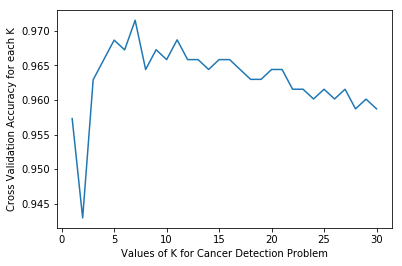

In [21]:
plt.plot(k_range,k_scores)
plt.xlabel("Values of K for Cancer Detection Problem")
plt.ylabel("Cross Validation Accuracy for each K")
plt.show()

In [22]:
max(k_scores) * 100

97.152859184090062

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(n_jobs=-1)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [25]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
print("Training Accuracy on LR : ",LR.score(X_train,y_train) * 100)

print("Testing Accuracy on LR : ",LR.score(X_test,y_test) * 100)

Training Accuracy on LR :  95.9923664122
Testing Accuracy on LR :  95.4285714286


In [27]:
print(cross_val_score(LR,X,y,cv=10,n_jobs=-1).mean() * 100)

95.8630041116


#### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15,n_jobs=-1)

In [63]:
rf.fit(X_train,y_train)

C:\Users\Viraj Pawar\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [64]:
y_pred = rf.predict(X_test)

In [65]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[85,  0],
       [ 1, 54]])

In [66]:
rf.score(X_test,y_test) * 100

99.285714285714292

In [67]:
scores = cross_val_score(rf,X,y,cv=10,n_jobs=-1)
scores.mean() * 100

96.150847111655452

#### SVC

In [68]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

In [69]:
svc.fit(X_train,y_train)

C:\Users\Viraj Pawar\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
y_pred = svc.predict(X_test)

In [71]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[79,  6],
       [ 1, 54]])

In [72]:
svc.score(X_test,y_test) * 100

95.0

In [73]:
scores = cross_val_score(svc,X,y,cv=10,n_jobs=-1)
scores.mean() * 100

95.871110722304863